In [1]:
from sim import RequestsReactiveSimulation
# Parâmetros da simulação
network_info = {
    'n_initial_eprs': 5,  # Número inicial de pares EPR disponíveis na rede
    'n_initial_qubits': 10,  # Número inicial de qubits disponíveis na rede
    'topology_name': 'Grade',  # Nome da topologia a ser utilizada
    'topology_params': (3,4)  # Parâmetros da topologia (Grade: linhas e colunas)
}
info_controller = {
    'default_ttl': 30  # Tempo de vida padrão (TTL) das regras no controlador
}
info_request = {
    'n_requests': 50,  # Número de requisições a serem processadas
    'fidelity_requests_range': (0.8, 0.95),  # Intervalo de fidelidade das requisições
    'n_eprs_requests_range': (1, 5)  # Intervalo do número de EPRs por requisição
}
info_simulation = {
    'file_path': 'resultados/proativo/proactive_request_sync.csv',  # Caminho do arquivo de saída da simulação
    'time_to_refill': 10,  # Tempo em segundos para reabastecimento de recursos
    'n_qubits_to_refill': 5,  # Número de qubits a serem reabastecidos
    'n_eprs_to_refill': 3  # Número de pares EPR a serem reabastecidos
}
simulation = RequestsReactiveSimulation(network_info, info_controller, info_request, info_simulation)

In [2]:
simulation.run()

Adicionando regras para 0
+---------------------+----------------------+--------------------+
| Match               | Route                | Rule               |
+=====================+======================+====================+
| (0, (0.5, 0.6), 5)  | [0]                  | BasicRuleProactive |
+---------------------+----------------------+--------------------+
| (0, (0.8, 0.9), 5)  | [0]                  | BasicRuleProactive |
+---------------------+----------------------+--------------------+
| (1, (0.5, 0.6), 5)  | [0, 1]               | BasicRuleProactive |
+---------------------+----------------------+--------------------+
| (1, (0.8, 0.9), 5)  | [0, 1]               | BasicRuleProactive |
+---------------------+----------------------+--------------------+
| (2, (0.5, 0.6), 5)  | [0, 1, 2]            | BasicRuleProactive |
+---------------------+----------------------+--------------------+
| (2, (0.8, 0.9), 5)  | [0, 1, 2]            | BasicRuleProactive |
+---------------------

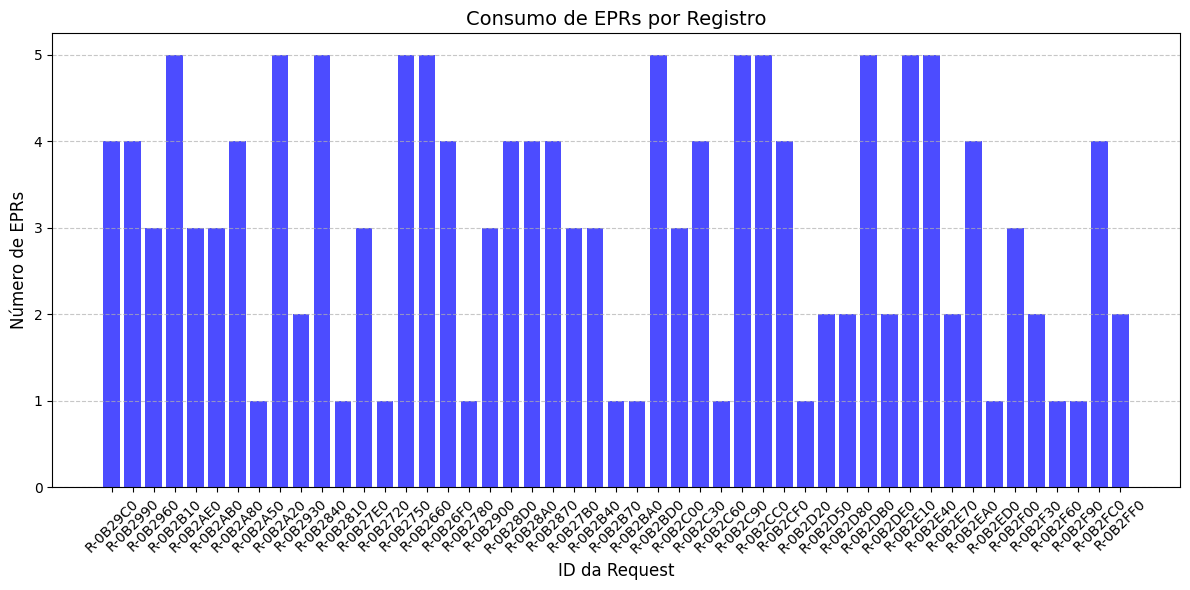

In [ ]:
def plot_eprs_per_request(csv_file):
    """
    Plota o número de EPRs consumidos por registro.
    
    Parâmetros:
        csv_file (str): Caminho para o arquivo CSV.
    """
    # Lê o arquivo CSV com cabeçalho explícito
    data = pd.read_csv(
        csv_file, 
        header=0,  # Assume que o arquivo tem cabeçalho na primeira linha
        names=["ID", "Alice", "Bob", "Fidelidade Minima", "Numero de EPRs", "Inicio", "Termino", "Novo Registro"]
    )

    # Cria o gráfico
    plt.figure(figsize=(12, 6))
    plt.bar(data['ID'], data['Numero de EPRs'], color='blue', alpha=0.7)

    # Configurações do gráfico
    plt.title('Consumo de EPRs por Registro', fontsize=14)
    plt.xlabel('ID da Request', fontsize=12)
    plt.ylabel('Número de EPRs', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Exibe o gráfico
    plt.show()
# Exemplo de uso:
plot_eprs_per_request(info_simulation['file_path'])


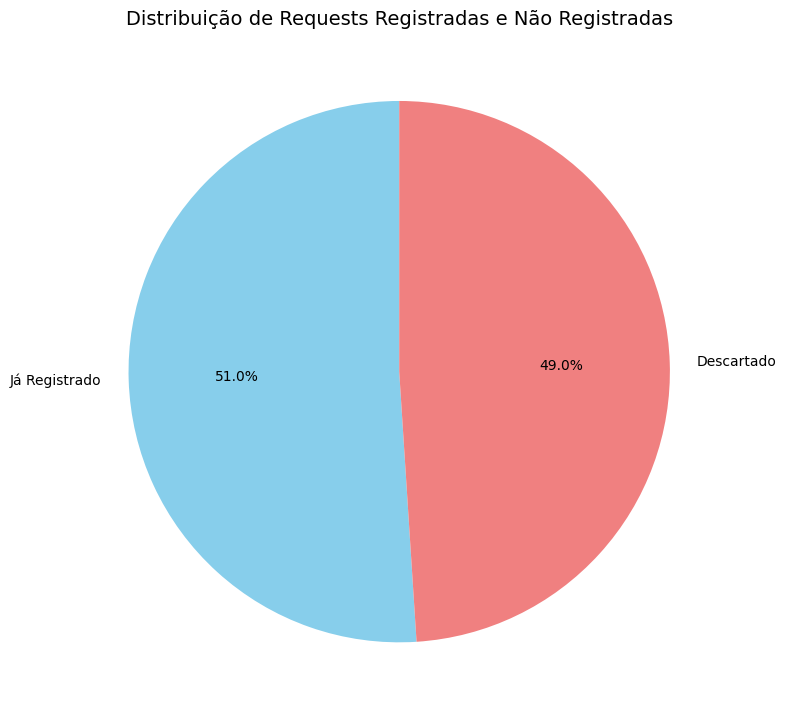

In [ ]:
def plot_registration_status(csv_file):
    """
    Plota o status dos registros (quantidade de requests novas e já registradas).
    
    Parâmetros:
        csv_file (str): Caminho para o arquivo CSV.
    """
    # Lê o arquivo CSV com cabeçalho explícito
    data = pd.read_csv(
        csv_file, 
        header=0,  # Assume que o arquivo tem cabeçalho na primeira linha
        names=["ID", "Alice", "Bob", "Fidelidade Minima", "Numero de EPRs", "Inicio", "Termino", "Novo Registro"]
    )

    # Conta os valores de "Novo Registro"
    status_counts = data['Novo Registro'].value_counts()

    # Cria o gráfico
    plt.figure(figsize=(8, 8))
    status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], labels=status_counts.index)
    
    # Configurações do gráfico
    plt.title('Distribuição de Requests Registradas e Não Registradas', fontsize=14)
    plt.ylabel('')  # Remove o rótulo do eixo Y
    plt.tight_layout()

    # Exibe o gráfico
    plt.show()

# Exemplo de uso:
plot_registration_status(info_simulation['file_path'])


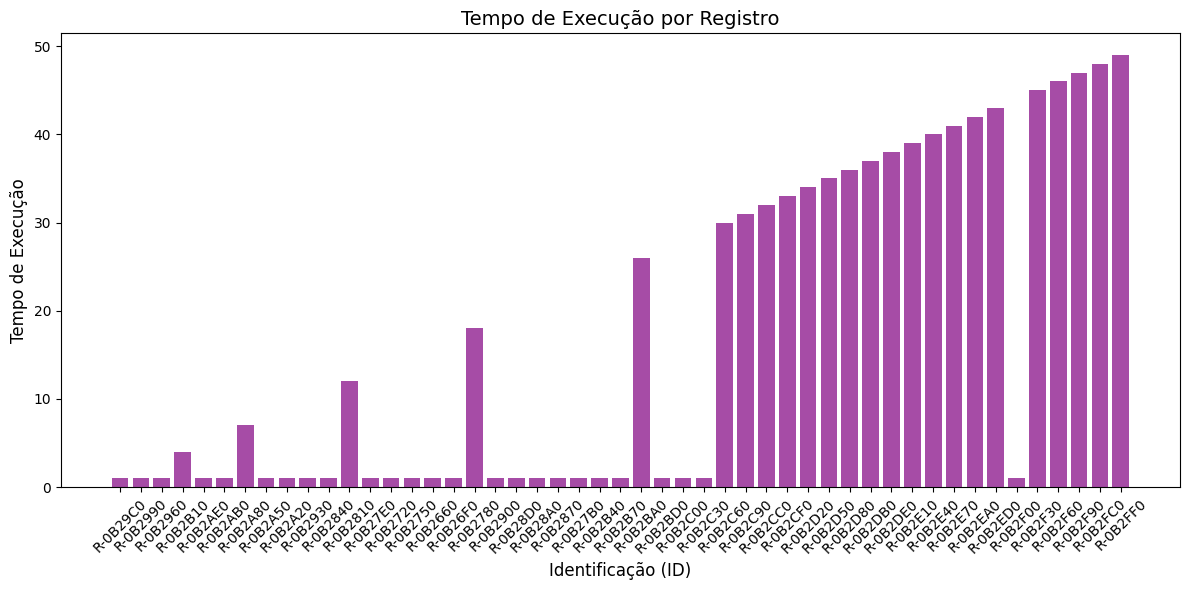

In [6]:
def plot_execution_time(csv_file):
    """
    Plota o tempo de execução por registro com base na diferença entre os tempos de início e término.
    
    Parâmetros:
        csv_file (str): Caminho para o arquivo CSV.
    """
    # Lê o arquivo CSV com cabeçalho explícito
    data = pd.read_csv(
        csv_file,
        header=0,
        names=["ID", "Alice", "Bob", "Fidelidade Minima", "Numero de EPRs", "Inicio", "Termino", "Novo Registro"]
    )

    # Calcula o tempo de execução como a diferença entre 'Termino' e 'Inicio'
    data['Tempo de Execução'] = data['Termino'] - data['Inicio']

    # Cria o gráfico
    plt.figure(figsize=(12, 6))
    plt.bar(data['ID'], data['Tempo de Execução'], color='purple', alpha=0.7)

    # Configurações do gráfico
    plt.title('Tempo de Execução por Registro', fontsize=14)
    plt.xlabel('Identificação (ID)', fontsize=12)
    plt.ylabel('Tempo de Execução', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # Rotaciona os IDs no eixo X para melhor visualização
    plt.tight_layout()

    # Exibe o gráfico
    plt.show()

# Exemplo de uso:
plot_execution_time(info_simulation['file_path'])

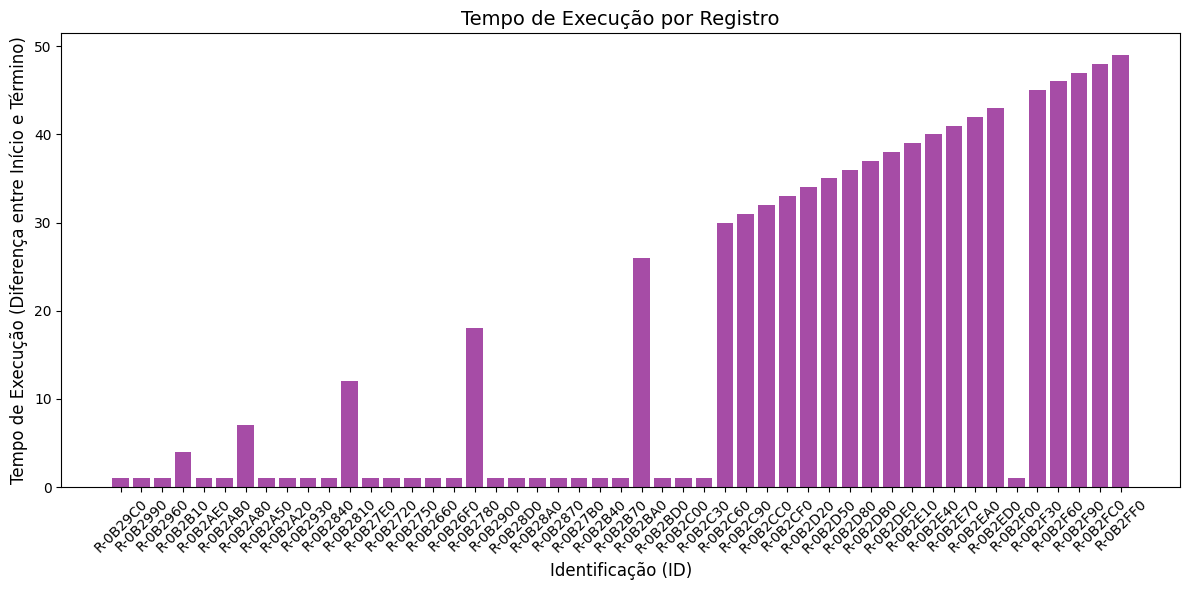

In [7]:
def plot_execution_time(csv_file):
    """
    Plota o tempo de execução por registro com base na diferença entre os tempos de início e término.
    
    Parâmetros:
        csv_file (str): Caminho para o arquivo CSV.
    """
    # Lê o arquivo CSV com cabeçalho explícito
    data = pd.read_csv(
        csv_file,
        header=0,
        names=["ID", "Alice", "Bob", "Fidelidade Minima", "Numero de EPRs", "Inicio", "Termino", "Novo Registro"]
    )

    # Calcula o tempo de execução como a diferença entre 'Termino' e 'Inicio'
    data['Tempo de Execução'] = data['Termino'] - data['Inicio']

    # Cria o gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.bar(data['ID'], data['Tempo de Execução'], color='purple', alpha=0.7)

    # Configurações do gráfico
    plt.title('Tempo de Execução por Registro', fontsize=14)
    plt.xlabel('Identificação (ID)', fontsize=12)
    plt.ylabel('Tempo de Execução (Diferença entre Início e Término)', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # Rotaciona os IDs no eixo X para melhor visualização
    plt.tight_layout()

    # Exibe o gráfico
    plt.show()

# Exemplo de uso:
plot_execution_time(info_simulation['file_path'])
